In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análise temporal e impacto relativo da COVID-19 por país

1. *Introdução*

Este projeto analisa a evolução global da COVID-19 utilizando dados consolidados por país. O objetivo é identificar padrões temporais, países mais impactados e analisar métricas como taxa de letalidade e recuperação.

*2. Entendimento dos Dados*

- Estrutura

In [4]:
df = pd.read_csv('/content/sample_data/covid_19_clean_complete.csv')
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


- Tipos

In [5]:
df.info()
df.columns
df.isnull().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB



 - Análise de duplicatas

In [7]:
df.duplicated().sum()

np.int64(0)

Não apresentou registros de duplicatas.

- Análise dos valores nulos

In [8]:
df.isnull().sum()

,0
Province/State,34404
Country/Region,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


A coluna Province/State apresenta valores ausentes devido a ausencia de subdivisao administrativa em diversos paises. Os valores nulos foram mantidos para preservar a integridade dos dados.

 - Análise exploratória

      - Paises com mais casos confirmados no periodo

In [9]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

,Confirmed
Country/Region,
US,4290259
Brazil,2442375
India,1480073
Russia,816680
South Africa,452529
Mexico,395489
Peru,389717
Chile,347923
United Kingdom,300111


- Evolução temporal

    - Como evoluíram os casos globais oa longo do tempo?

In [10]:
global_cases = df.groupby('Date')['Confirmed'].sum()
global_cases.tail()

,Confirmed
Date,
2020-07-23,15510481
2020-07-24,15791645
2020-07-25,16047190
2020-07-26,16251796
2020-07-27,16480485


 A série temporal global apresenta um crescimento contínuo dos casos confirmados ao longo do período analisado, evidenciando a rápida disseminação do vírus a nível mundial.

    - Quais países tiveram mais casos confirmados?

In [11]:
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)

,Confirmed
Country/Region,
US,4290259
Brazil,2442375
India,1480073
Russia,816680
South Africa,452529
Mexico,395489
Peru,389717
Chile,347923
United Kingdom,300111


    - Quais países tiveram mais mortes?

In [12]:
df.groupby('Country/Region')['Deaths'].max().sort_values(ascending=False).head(10)

,Deaths
Country/Region,
US,148011
Brazil,87618
United Kingdom,45759
Mexico,44022
Italy,35112
India,33408
France,30096
Spain,28752
Peru,18418


É possível observar que o Brasil e os Estados Unidos lideram o ranking de óbitos acumulados no período analisado. Os países europeus como o Reino Unido, França, Itália e Espanha também figuram entre os mais impactados, refletindo a forte primeira onda da pandemia na Europa. Os registros do México, Peru e Irã evidencia o impacto significativo em diferentes regiões do mundo.

Países com números semelhantes de casos podem apresentar diferenças relevantes no número de mortes, o que pode estar associado a fatores como estrutura de saúde, subnotificação, perfil etário da população e políticas públicas.

    - Qual a relação entre casos confirmados, recuperados e mortes?

In [13]:
df[['Confirmed', 'Deaths', 'Recovered']].corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.912361,0.895506
Deaths,0.912361,1.000000,0.763090
Recovered,0.895506,0.763090,1.000000


 A análise indica uma forte relação positiva entre casos confirmados e número de óbitos (0,91), assim como entre casos confirmados e recuperações (0,89). Estes resultados são esperados, uma vez que países com maior volume de casos tendem a apresentar números absolutos maiores tanto de mortes quanto de recuperações. A correlação entre óbitos e recuperações, embora ainda elevada (0,76), é inferior, refletindo diferenças no sistema de saúde, estratégias de testagem e registro de dados entre países.

     - E no Brasil? Como foi a evolulçao dos casos?

In [14]:
brasil = df[df['Country/Region']=='Brazil']
brasil_time = brasil.groupby('Date')['Confirmed'].sum()
brasil_time.tail()

,Confirmed
Date,
2020-07-23,2287475
2020-07-24,2343366
2020-07-25,2394513
2020-07-26,2419091
2020-07-27,2442375


A análise da evolução temporal dos casos confirmados no Brasil evidencia um crescimento contínuo ao longo do período analisado, com aumento expressivo de casos diários no final de julho de 2020. Esse comportamento reforça o cenário de expansão da pandemia no país durante esse intervalo temporal.

    - Como os casos se distribuem por região da OMS?

In [15]:
df.groupby('WHO Region')['Confirmed'].max().sort_values(ascending=False)

,Confirmed
WHO Region,
Americas,4290259
South-East Asia,1480073
Europe,816680
Africa,452529
Eastern Mediterranean,293606
Western Pacific,82040


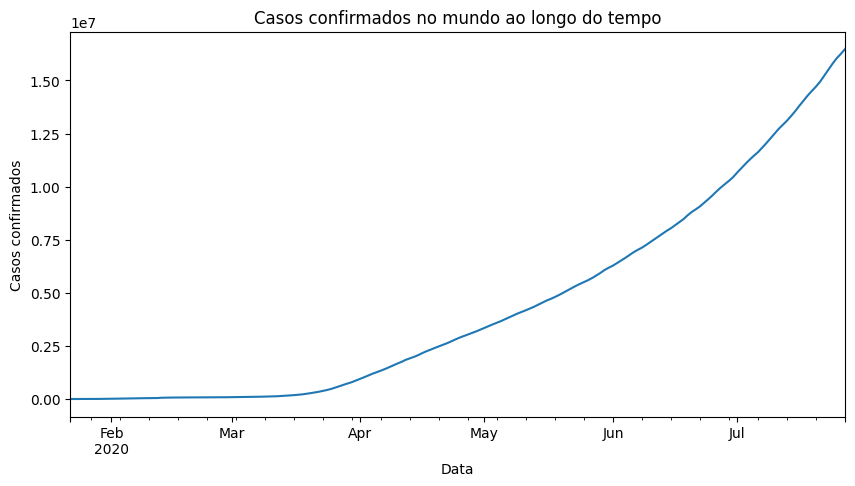

In [16]:
global_cases.plot(figsize=(10,5), title = 'Casos confirmados no mundo ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.show()

O gráfico acima mostra o crescimento acelerado dos casos globais, como padrão inicialmente exponencial. A inclinação crescente indica rápida disseminação nos primeiros meses, refletindo expansão simultânea da pandemia em múltiplas regiões.

    - Como os casos evoluíram no Brasil?


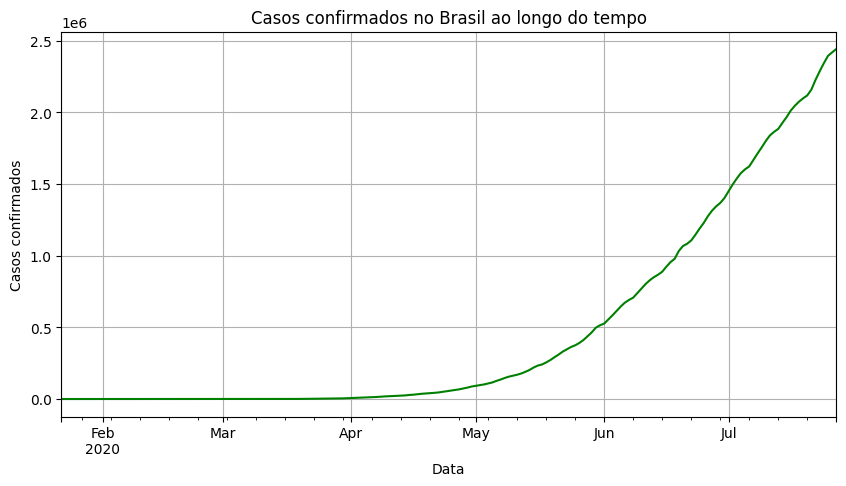

In [17]:
brazil = df[df['Country/Region'] == 'Brazil'].groupby('Date')['Confirmed'].max()

plt.figure(figsize = (10,5))
brazil.plot(color = 'green')
plt.title('Casos confirmados no Brasil ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Casos confirmados')
plt.grid(True)
plt.show()

Este formato quase exponencial da curva no gráfico acima indica que, durante grande parte do período analisado, a taxa de crescimento permaneceu elevada. Para identificar momentos de desaceleração, seria necessário analisar novos casos diários, crescimento percentual diário e a média móvel de sete dias. Sem essas métricas, o gráfico evidencia o impacto acumulado, mas não permite avaliar com precisão possíveis mudanças na dinâmica de transmissão.

    - Existe relação entre casos, mortes e recuperados?

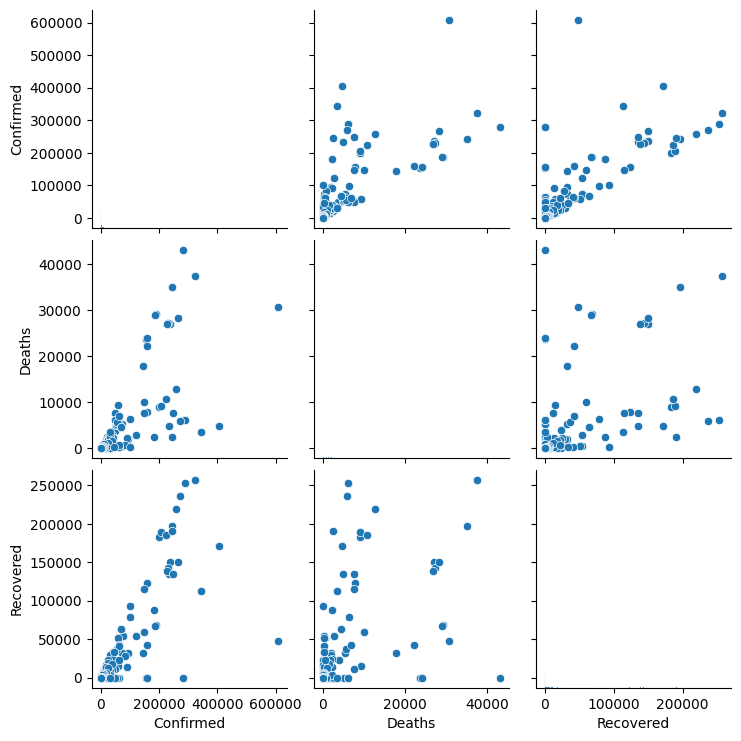

In [18]:
sns.pairplot(df[['Confirmed', 'Deaths', 'Recovered']].sample(1000))
plt.show()

A concentração maior de pontos próximos da origem indica que a maioria das observações corresponde a regiões ou períodos com baixo número absoluto de casos, enquanto poucos registros concentram valores extremamente altos (outliers), representando países fortemente impactados.
Esses outliers exercem influência significativa na correlação geral, reforçando a importância de analisar também métricas relativas (como taxa de letalidade), e não apenas números absolutos.

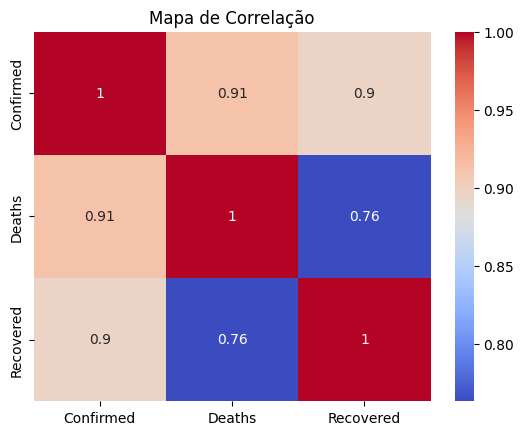

In [25]:
sns.heatmap(df[['Confirmed','Deaths','Recovered']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Mapa de Correlação")
plt.show()

O heatmap demonstra forte correlação positiva entre casos confirmados, mortes e recuperações. A alta associação é esperada, uma vez que todas as variáveis refletem diferentes desfechos do mesmo processo epidemiológico e crescem de forma acumulativa ao longo do tempo.

    - Quais países têm a maior taxa de letalidade?

In [19]:
df['Fatality_Rate'] = df['Deaths'] / df['Confirmed']
df['Recovery_Rate'] = df['Recovered'] / df['Confirmed']

In [20]:
fatality_by_country = df.groupby('Country/Region')['Fatality_Rate'].max().sort_values(ascending=False).head(10)
fatality_by_country

,Fatality_Rate
Country/Region,
China,1.0
Iran,1.0
Guyana,1.0
United Kingdom,1.0
Sudan,1.0
Philippines,0.5
Nicaragua,0.5
Gambia,0.5
Guatemala,0.5


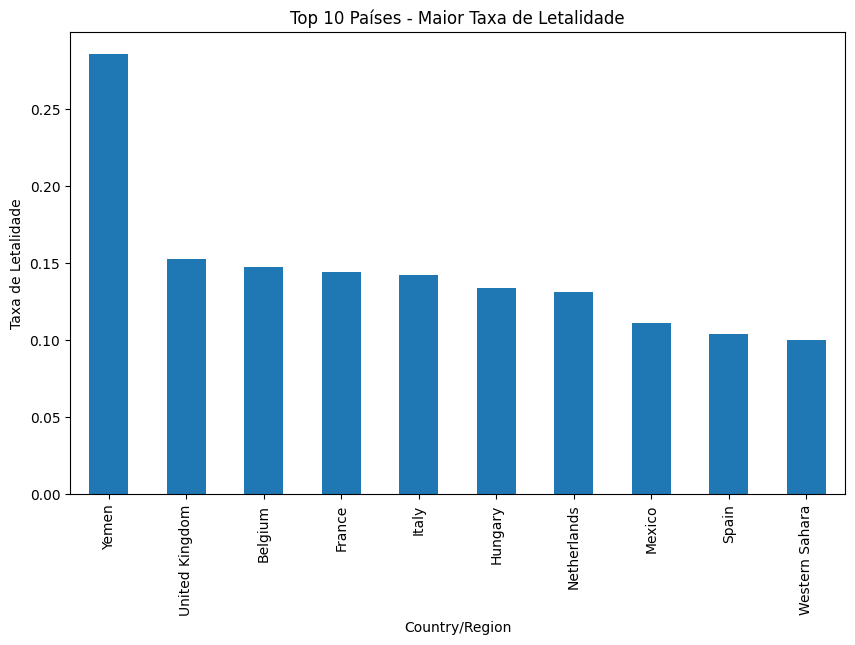

In [26]:
latest = df[df['Date'] == df['Date'].max()]
fatality = latest.groupby('Country/Region')['Fatality_Rate'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
fatality.plot(kind='bar')
plt.title("Top 10 Países - Maior Taxa de Letalidade")
plt.ylabel("Taxa de Letalidade")
plt.show()

O gráfico evidencia os países com maior taxa de letalidade no período analisado. Diferentemente do volume absoluto de casos ou mortes, essa métrica permite avaliar o impacto relativo da pandemia em cada país.

Observa-se que alguns países com menor número total de casos podem apresentar taxas de letalidade superiores às de países com maior volume absoluto, o que pode estar associado a fatores como: capacidade do sistema de saúde, perfil demográfico da população, subnotificação de casos leves, estratégias e volume de testagem.
A alta taxa de letalidade pode indicar tanto maior gravidade clínica quanto possível subnotificação de casos confirmados, elevando artificialmente o percentual de óbitos.

É importante considerar que a taxa de letalidade baseada em dados acumulados pode variar ao longo do tempo e ser influenciada por: defasagem entre confirmação do caso e óbito, mudanças na política de testagem e aprimoramento no tratamento ao longo da pandemia.
Portanto, a comparação entre países deve ser interpretada com cautela, especialmente sem ajuste por população ou controle por período específico.

 - Brasil x Outros Países

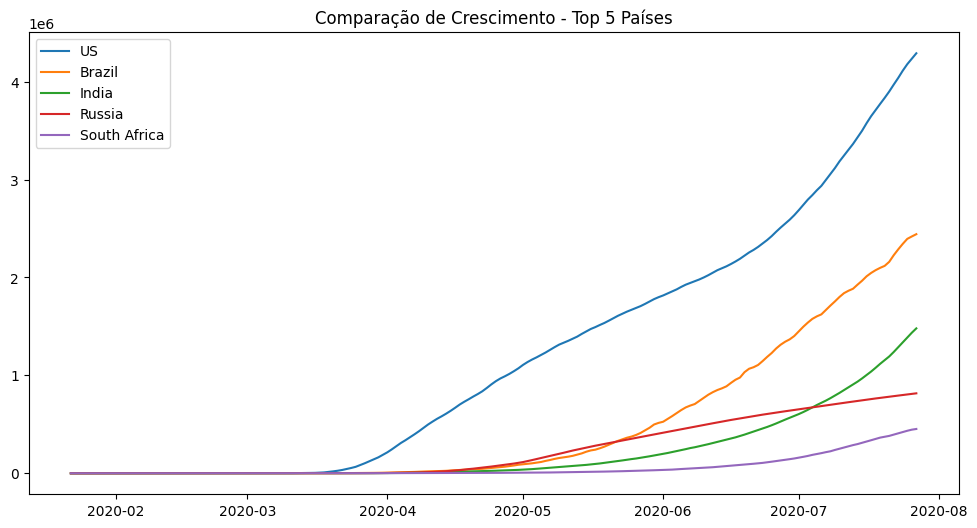

In [24]:
top5 = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5).index

plt.figure(figsize=(12,6))

for country in top5:
    serie = df[df['Country/Region'] == country].groupby('Date')['Confirmed'].max()
    plt.plot(serie, label=country)

plt.legend()
plt.title("Comparação de Crescimento - Top 5 Países")
plt.show()

Como o gráfico apresenta valores acumulados, a comparação visual tende a favorecer países com maior população ou maior volume absoluto de casos. Portanto, embora seja útil para observar impacto total, ele não permite comparação proporcional justa. Para uma análise mais precisa entre países, seria recomendável: ajustar por população (casos por milhão de habitantes), analisar crescimento percentual diário e utilizar média móvel para suavizar variações.